<a href="https://colab.research.google.com/github/jrctechmind/data-science-portfolio/blob/main/Fortescue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Função para calcular as componentes de sequência
def calcular_sequencias(dados):
    resultados = []
    for _, row in dados.iterrows():
        I_A, I_B, I_C = row
        I_0 = (I_A + I_B + I_C) / 3

        # Ajustado para tratar de I_0 com valores iguais
        if I_A == I_B == I_C:
            I_0 = 0

        a = np.exp(1j * 2 * np.pi / 3)
        a2 = np.exp(-1j * 2 * np.pi / 3)
        I_1 = (I_A + a * I_B + a2 * I_C) / 3
        I_2 = (I_A + a2 * I_B + a * I_C) / 3
        resultados.append((I_0, I_1, I_2))
    return resultados

# Fazer upload do arquivo CSV
print("Por favor, selecione o arquivo 'correntes.csv' para upload:")
uploaded = files.upload()

# Carregar dados do arquivo CSV
nome_arquivo = next(iter(uploaded))
dados = pd.read_csv(nome_arquivo, header=None, decimal=',', sep=';')  # Usando sep=';'

# Inspecionar os dados
print(dados.head())

# Verificar se cada linha tem exatamente três valores
if dados.shape[1] != 3:
    raise ValueError("Cada linha no arquivo CSV deve conter exatamente três valores.")

# Calcular componentes de sequência
resultados = calcular_sequencias(dados)

# Calcular médias e desvios padrão
I0_media = np.mean([res[0] for res in resultados])
I1_media = np.mean([res[1] for res in resultados])
I2_media = np.mean([res[2] for res in resultados])

I0_desvio_padrao = np.std([res[0] for res in resultados])
I1_desvio_padrao = np.std([res[1] for res in resultados])
I2_desvio_padrao = np.std([res[2] for res in resultados])

# Análise dos Resultados
print("\nAnálise dos Resultados:")
print("1. Componente de Sequência Zero (I_0): Média = {:.2f} A, Desvio Padrão = {:.2f} A".format(I0_media, I0_desvio_padrao))
print("2. Componente de Sequência Positiva (I_1): Média = {:.2f} + j{:.2f} A, Desvio Padrão = {:.2f} A".format(I1_media.real, I1_media.imag, I1_desvio_padrao))
print("3. Componente de Sequência Negativa (I_2): Média = {:.2f} + j{:.2f} A, Desvio Padrão = {:.2f} A".format(I2_media.real, I2_media.imag, I2_desvio_padrao))

# Análise crítica ajustada
print("\nAnálise Crítica:")
if abs(I0_media) < 0.01:
    print("A média da componente de sequência zero (I_0) está próxima de zero, o que é esperado em um sistema perfeitamente equilibrado.")
else:
    print("A média da componente de sequência zero (I_0) indicou um possível desequilíbrio simétrico nas fases. Verifique possíveis problemas de falta de neutro ou falhas em equipamentos de medição.")

if abs(I1_media.real) < 0.01 and abs(I1_media.imag) < 0.01 and I1_desvio_padrao < 0.01:
    print("A média e o desvio padrão das componentes de sequência positiva (I_1) estão próximos de zero, o que é esperado em um sistema perfeitamente equilibrado.")
else:
    print("A média e/ou o desvio padrão das componentes de sequência positiva (I_1) indicaram um possível desequilíbrio assimétrico entre as fases. Recomenda-se verificar conexões soltas ou problemas em equipamentos de proteção.")

if abs(I2_media.real) < 0.01 and abs(I2_media.imag) < 0.01 and I2_desvio_padrao < 0.01:
    print("A média e o desvio padrão das componentes de sequência negativa (I_2) estão próximos de zero, o que é esperado em um sistema perfeitamente equilibrado.")
else:
    print("A média e/ou o desvio padrão das componentes de sequência negativa (I_2) indicaram um possível desequilíbrio assimétrico entre as fases. Verifique possíveis falhas em isolamento ou presença de harmônicos.")



Por favor, selecione o arquivo 'correntes.csv' para upload:


Saving teste.csv to teste (27).csv
    0   1   2
0  11  10  10
1  11  10  10
2  11  10  10
3  11  10  10
4  11  10  10

Análise dos Resultados:
1. Componente de Sequência Zero (I_0): Média = 10.33 A, Desvio Padrão = 0.00 A
2. Componente de Sequência Positiva (I_1): Média = 0.33 + j0.00 A, Desvio Padrão = 0.00 A
3. Componente de Sequência Negativa (I_2): Média = 0.33 + j0.00 A, Desvio Padrão = 0.00 A

Análise Crítica:
A média da componente de sequência zero (I_0) indicou um possível desequilíbrio simétrico nas fases. Verifique possíveis problemas de falta de neutro ou falhas em equipamentos de medição.
A média e/ou o desvio padrão das componentes de sequência positiva (I_1) indicaram um possível desequilíbrio assimétrico entre as fases. Recomenda-se verificar conexões soltas ou problemas em equipamentos de proteção.
A média e/ou o desvio padrão das componentes de sequência negativa (I_2) indicaram um possível desequilíbrio assimétrico entre as fases. Verifique possíveis falhas em isolam

Por favor, selecione o arquivo 'correntes.csv' para upload:


Saving correntes.csv to correntes.csv
Cabeçalho dos dados:
    I_A   I_B   I_C
0  4.19  4.25  4.43
1  4.12  4.18  4.36
2  3.52  3.56  3.69
3  4.27  4.33  4.49
4  4.17  4.24  4.38

Análise Descritiva dos Dados:
             I_A        I_B        I_C
count  71.000000  71.000000  71.000000
mean    4.530423   4.565634   4.601831
std     1.596347   1.626020   1.686174
min     0.340000   0.310000   0.250000
25%     4.145000   4.210000   4.350000
50%     5.050000   5.110000   5.180000
75%     5.645000   5.680000   5.755000
max     6.400000   6.480000   6.650000

Verificação de Valores Nulos:
I_A    0
I_B    0
I_C    0
dtype: int64


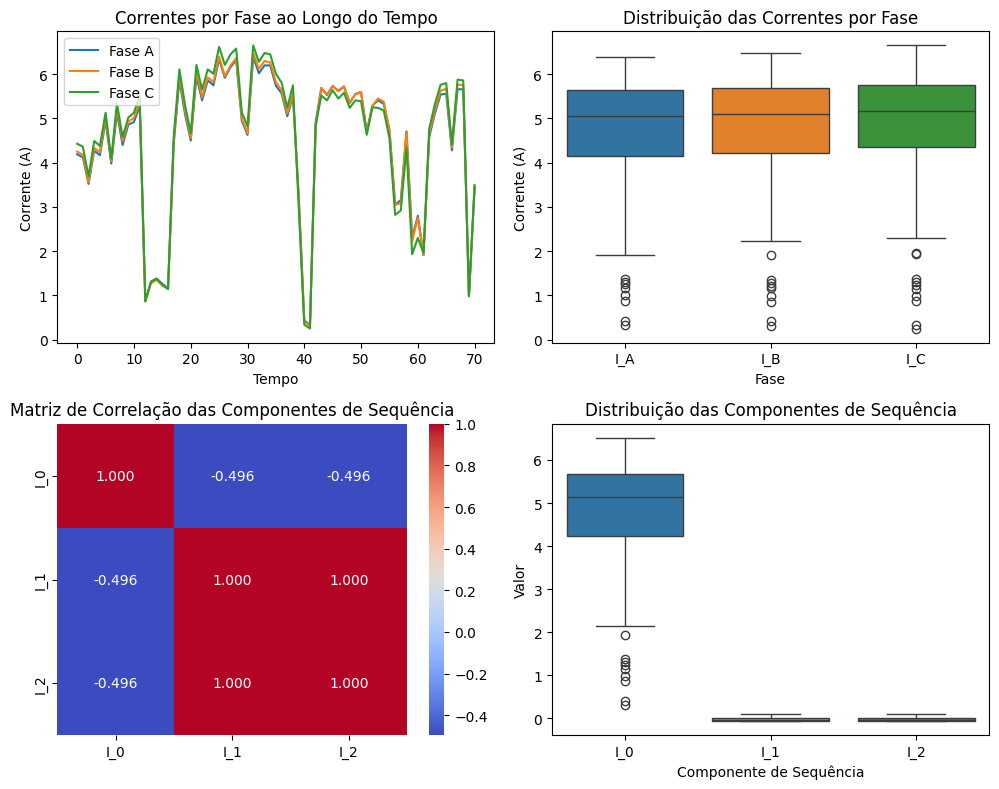


Análise dos Resultados:
1. Componente de Sequência Zero (I_0): Média = 4.57 A, Desvio Padrão = 1.62 A
2. Componente de Sequência Positiva (I_1): Média = 0.06 A, Desvio Padrão = 0.03 A
3. Componente de Sequência Negativa (I_2): Média = 0.06 A, Desvio Padrão = 0.03 A

Análise Crítica:
A média da componente de sequência zero (I_0) indicou um possível desequilíbrio simétrico nas fases. Verifique possíveis problemas de falta de neutro ou falhas em equipamentos de medição.
A média e/ou o desvio padrão das componentes de sequência positiva (I_1) indicaram um possível desequilíbrio assimétrico entre as fases. Recomenda-se verificar conexões soltas ou problemas em equipamentos de proteção.
A média e/ou o desvio padrão das componentes de sequência negativa (I_2) indicaram um possível desequilíbrio assimétrico entre as fases. Verifique possíveis falhas em isolamento ou presença de harmônicos.


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Função para calcular as componentes de sequência
def calcular_sequencias(dados):
    resultados = []
    for _, row in dados.iterrows():
        I_A, I_B, I_C = row
        I_0 = (I_A + I_B + I_C) / 3

        # Ajustado para tratar de I_0 com valores iguais
        if I_A == I_B == I_C:
            I_0 = 0

        a = np.exp(1j * 2 * np.pi / 3)
        a2 = np.exp(-1j * 2 * np.pi / 3)
        I_1 = (I_A + a * I_B + a2 * I_C) / 3
        I_2 = (I_A + a2 * I_B + a * I_C) / 3
        resultados.append((I_0, I_1, I_2))
    return resultados

# Fazer upload do arquivo CSV
print("Por favor, selecione o arquivo 'correntes.csv' para upload:")
uploaded = files.upload()

# Carregar dados do arquivo CSV
nome_arquivo = next(iter(uploaded))
dados = pd.read_csv(nome_arquivo, header=None, decimal=',', sep=';')  # Usando sep=';'

# Renomear colunas para melhor compreensão
dados.columns = ['I_A', 'I_B', 'I_C']

# Inspecionar os dados
print("Cabeçalho dos dados:")
print(dados.head())

# Verificar se cada linha tem exatamente três valores
if dados.shape[1] != 3:
    raise ValueError("Cada linha no arquivo CSV deve conter exatamente três valores.")

# Análise descritiva dos dados
print("\nAnálise Descritiva dos Dados:")
print(dados.describe())

# Verificar valores nulos
print("\nVerificação de Valores Nulos:")
print(dados.isnull().sum())

# Layout dos gráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de correntes ao longo do tempo (supondo que os dados estão ordenados temporalmente)
axs[0, 0].plot(dados['I_A'], label='Fase A')
axs[0, 0].plot(dados['I_B'], label='Fase B')
axs[0, 0].plot(dados['I_C'], label='Fase C')
axs[0, 0].set_title('Correntes por Fase ao Longo do Tempo')
axs[0, 0].set_xlabel('Tempo')
axs[0, 0].set_ylabel('Corrente (A)')
axs[0, 0].legend()

# Visualização das distribuições das correntes
sns.boxplot(data=dados, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição das Correntes por Fase')
axs[0, 1].set_xlabel('Fase')
axs[0, 1].set_ylabel('Corrente (A)')

# Calcular componentes de sequência
resultados = calcular_sequencias(dados)

# Converter resultados para DataFrame
resultados_df = pd.DataFrame(resultados, columns=['I_0', 'I_1', 'I_2'])

# Extrair parte real das componentes de sequência para evitar alertas de ComplexWarning
resultados_df_real = resultados_df.applymap(np.real)

# Matriz de Correlação das Componentes de Sequência
correlation_matrix = resultados_df_real.corr()

# Plotar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", ax=axs[1, 0])
axs[1, 0].set_title('Matriz de Correlação das Componentes de Sequência')

# Visualização das distribuições das componentes de sequência
sns.boxplot(data=resultados_df_real, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição das Componentes de Sequência')
axs[1, 1].set_xlabel('Componente de Sequência')
axs[1, 1].set_ylabel('Valor')

# Ajustes de layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

# Análise dos Resultados
print("\nAnálise dos Resultados:")
print("1. Componente de Sequência Zero (I_0): Média = {:.2f} A, Desvio Padrão = {:.2f} A".format(np.mean(np.abs(resultados_df['I_0'])), np.std(np.abs(resultados_df['I_0']))))
print("2. Componente de Sequência Positiva (I_1): Média = {:.2f} A, Desvio Padrão = {:.2f} A".format(np.mean(np.abs(resultados_df['I_1'])), np.std(np.abs(resultados_df['I_1']))))
print("3. Componente de Sequência Negativa (I_2): Média = {:.2f} A, Desvio Padrão = {:.2f} A".format(np.mean(np.abs(resultados_df['I_2'])), np.std(np.abs(resultados_df['I_2']))))

# Análise Crítica
print("\nAnálise Crítica:")
I0_media = np.mean(np.abs(resultados_df['I_0']))
I1_media = np.mean(np.abs(resultados_df['I_1']))
I2_media = np.mean(np.abs(resultados_df['I_2']))

I0_desvio_padrao = np.std(np.abs(resultados_df['I_0']))
I1_desvio_padrao = np.std(np.abs(resultados_df['I_1']))
I2_desvio_padrao = np.std(np.abs(resultados_df['I_2']))

if abs(I0_media) < 0.01:
    print("A média da componente de sequência zero (I_0) está próxima de zero, o que é esperado em um sistema perfeitamente equilibrado.")
else:
    print("A média da componente de sequência zero (I_0) indicou um possível desequilíbrio simétrico nas fases. Verifique possíveis problemas de falta de neutro ou falhas em equipamentos de medição.")

if abs(I1_media) < 0.01 and I1_desvio_padrao < 0.01:
    print("A média e o desvio padrão das componentes de sequência positiva (I_1) estão próximos de zero, o que é esperado em um sistema perfeitamente equilibrado.")
else:
    print("A média e/ou o desvio padrão das componentes de sequência positiva (I_1) indicaram um possível desequilíbrio assimétrico entre as fases. Recomenda-se verificar conexões soltas ou problemas em equipamentos de proteção.")

if abs(I2_media) < 0.01 and I2_desvio_padrao < 0.01:
    print("A média e o desvio padrão das componentes de sequência negativa (I_2) estão próximos de zero, o que é esperado em um sistema perfeitamente equilibrado.")
else:
    print("A média e/ou o desvio padrão das componentes de sequência negativa (I_2) indicaram um possível desequilíbrio assimétrico entre as fases. Verifique possíveis falhas em isolamento ou presença de harmônicos.")
